# Noisy precession
If we consider a precession with connstant angular velocity $\omega_0$, then we can predict the angular position at any time $t$ as
$$\varphi(t) = \varphi_0 + \omega_0t,$$
but if we add a noise to the system, and we describe the noise as a _variation of the frequency_
$$\omega = \omega_0 → \omega(t) = \omega_0 + \hat{\omega}(t)$$
where we call $\hat{\omega}(t)$ **the noise**, then we'll have
$$\varphi(t) = \varphi_0 + \omega_0t + \int_0^tdt'\hat{\omega}(t')$$

# What we'll discuss
Here we limit our discussion to noise functions $\hat{\omega}(t)$ that can be written as "Gaussian packet of waves", explicitly as:
$$\hat{\omega}(t) = \sum_{\omega}C_{\omega}\sin(ωt+\phi_{\omega}),$$
where
$$C_{\omega} = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac12(\frac{\omega-\omega_c}{\sigma})}$$
and the phases $\phi_{\omega}$ are random variables (uniformly distributed in $[0, 2\pi]$.

By choosing the noise of this form, we have that the **deviation** from the trajectory without noise is
$$\varphi(t) - \varphi_0 - \omega_0t = \sum_{\omega}C_{\omega}(1-\cos(\omega t + \phi_{\omega}))$$

Here we'll try to characterize this deviation _as a function of_ $\omega_c, \sigma$.



In [44]:
import numpy as np
def gauss(mu,sigma,w):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((w-mu)/sigma)**2);

In [52]:
# Unperturbed parameters
w0 = 1;           # T = 2pi/w0
# Noise parameters
wc = 1;
sigma = 0.1;
N = int(1e1); # Number of frequency of the packet

# Generating noise
ws = np.linspace(-2*sigma+wc,2*sigma+wc,N);  # Packet freqs
cs = gauss(wc,sigma,ws);


# Time evolution of $\hat{\omega}(t)$ and of the **deviation**
Note that the wave in the packet with the bigger period $T$ is the one with the smaller frequency $\omega_{min} = \omega_c - 2\sigma$, that has period $T_{max} = \frac{2\pi}{\omega_c - 2\sigma}$.

So we have to compare the $t_{min} = 0$ and $t_{max} = N_{steps}dt$ of the simulation with this value $T_{max}$.

In [53]:
wmax = wc - 2*sigma;
Tmax = np.abs(2*np.pi/(wc-2*sigma));

# Evaluate noise (what) and deviation (dphi) as a function of increasing time
Nsteps = int(16e2);
dt = 10*Tmax/Nsteps; # Because Tmax is the time scale!

ts = np.linspace(0,Nsteps*dt,Nsteps);
dphi = np.zeros(Nsteps);  # DEVIATION
what = np.zeros(Nsteps);  # NOISE
for i in range(0,Nsteps):
    t = dt*i;
    dphi[i] = np.dot(cs, (1-np.cos(ws*t + np.random.rand()*2*np.pi)));
    what[i] = np.dot(cs, (np.sin(ws*t + np.random.rand()*2*np.pi)));


### $\hat{\omega}(t)$ is a _good_ noise function
Because from a noise function we require it to have a _time average over a long time_ that is zero. And $\hat{\omega}(t)$ seems to have this property, independently from the choice of the parameters.

Text(0, 0.5, 'noise $\\hat{\\omega}(t)$')

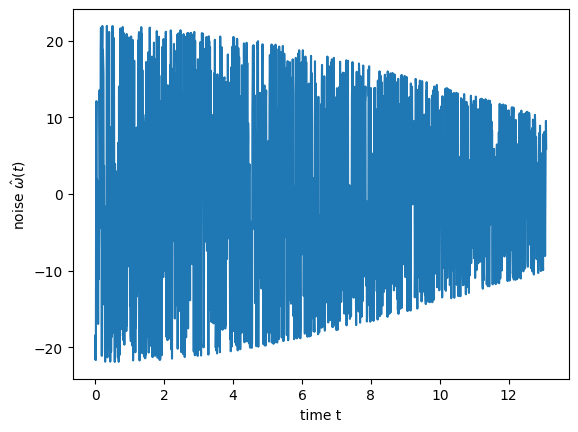

In [54]:
import matplotlib.pyplot as plt
plt.plot(ts, what)
plt.xlabel("time t")
plt.ylabel("noise $\hat{\omega}(t)$")

Text(0, 0.5, 'deviation')

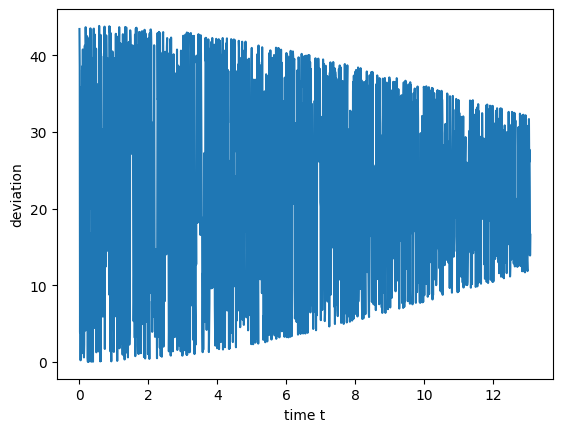

In [55]:
plt.plot(ts, dphi)
plt.xlabel("time t")
plt.ylabel("deviation")

# Conclusione
The noise effect does not depend on the relation between $\omega_0$ and $\omega_c$, because $\omega_0$ does not show up neither in the noise, nor in the deviation.

The effects of noise depend on $\sigma$, **BUT**:
The presence of the noise **does not** seem to **influence the deviation** of the trajectory $\varphi(t)$ **increasingly with time**.

In fact, near $t=0$, the deviation decreases instead of increasuing!!!

This is strange, because around you can hear that the effect of the noise over the trajectory of the precession becames more important as time passes.